In [1]:
!pip install -q jax jaxlib matplotlib
!rm -f jax_wave_solver_gcolab.py
!wget -q https://raw.githubusercontent.com/filkinc/diploma_centpy_parallelization_py/refs/heads/cpu-gpu-google-collab/jax_wave_solver_gcolab.py

In [2]:
import importlib
import jax
import jax_wave_solver_gcolab
importlib.reload(jax_wave_solver_gcolab)  # на всякий случай
from jax_wave_solver_gcolab import JAXWave2D, benchmark
from matplotlib import animation
from IPython.display import HTML

JAX devices: [CpuDevice(id=0)]
u device: TFRT_CPU_0


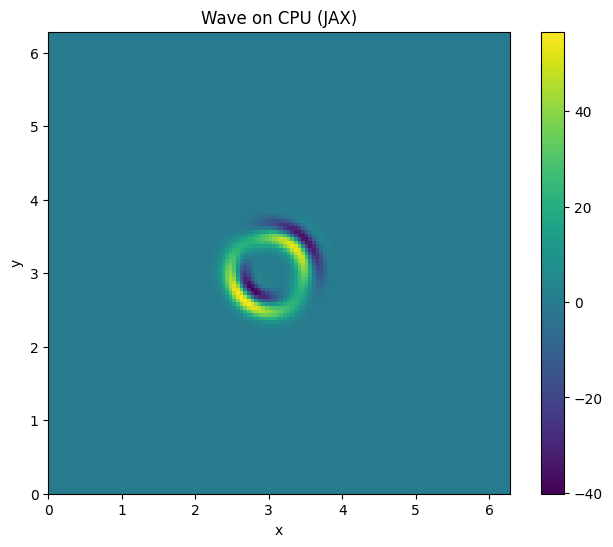

In [6]:
print("JAX devices:", jax.devices())
solver = JAXWave2D(nx=128, ny=128)
cpu = jax.devices("cpu")[0]

u = solver.solve(steps=200, device=cpu)
print("u device:", u.device)
solver.plot(u, title="Wave on CPU (JAX)")

In [8]:
device = jax.devices()[0]
anim = solver.animate(steps=200, every=4, device=device, interval=50)
HTML(anim.to_jshtml())

In [21]:
cpu = jax.devices("cpu")[0]
u_np, u_jax = benchmark(nx=128, ny=128, steps=200, device=cpu)

Device: TFRT_CPU_0
NumPy: 0.0502 s
JAX 1st (compile+run): 0.0133 s
JAX 2nd (warm):        0.0137 s
Speedup NumPy/JAX:     3.65x


In [1]:
cpu = jax.devices("cpu")[0]
u_np, u_jax = benchmark(nx=1024, ny=1024, steps=2000, device=cpu)

"""
    Результат для сравнения:
    Device: TFRT_CPU_0
    NumPy: 47.1002 s
    JAX 1st (compile+run): 10.9030 s
    JAX 2nd (warm):        13.0490 s
    Speedup NumPy/JAX:     3.61x
"""

SyntaxError: invalid decimal literal (1201406773.py, line 3)